In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load Data

In [2]:
df=pd.read_csv("relationships_19_final.csv",sep=";")

# General

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162369 entries, 0 to 162368
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   author            162369 non-null  object 
 1   Toxicity          161617 non-null  float64
 2   Severe Toxicity   161617 non-null  float64
 3   Profanity         161617 non-null  float64
 4   Identity Attack   161617 non-null  float64
 5   Insult            161617 non-null  float64
 6   Threat            161617 non-null  float64
 7   body              162369 non-null  object 
 8   controversiality  162369 non-null  bool   
 9   created_utc       162369 non-null  object 
 10  edited            162369 non-null  bool   
 11  gilded            162369 non-null  int64  
 12  id                162369 non-null  object 
 13  link_id           162369 non-null  object 
 14  parent_id         162369 non-null  object 
 15  score             162369 non-null  int64  
 16  created_hour      16

In [4]:
df.describe()

Toxicity  Severe Toxicity      Profanity  Identity Attack  \
count  161617.000000    161617.000000  161617.000000    161617.000000   
mean        0.193690         0.022147       0.130377         0.024783   
std         0.201499         0.066459       0.191691         0.053900   
min         0.000000         0.000315       0.000000         0.000388   
25%         0.041173         0.001469       0.018597         0.004014   
50%         0.111197         0.003071       0.037654         0.007363   
75%         0.285490         0.010147       0.141377         0.019475   
max         0.976685         0.952266       0.991133         0.864641   

              Insult         Threat         gilded          score  \
count  161617.000000  161617.000000  162369.000000  162369.000000   
mean        0.109041       0.024709       0.000474      13.161053   
std         0.160634       0.063095       0.023669      82.743180   
min         0.001621       0.000000       0.000000    -225.000000   
25%         0.015493       0.007262       0.000000       1.000000   
50%         0.030816       0.008505       0.000000       2.000000   
75%         0.105871       0.011793       0.000000       6.000000   
max         0.947744       0.748696       3.000000    6951.000000   

        created_hour    created_day  created_year    comment_len  \
count  162369.000000  162369.000000      162369.0  162369.000000   
mean       12.900726      15.112398        2019.0      73.416323   
std         7.259889       8.489592           0.0      81.755785   
min         0.000000       1.000000        2019.0       1.000000   
25%         6.000000       8.000000        2019.0      24.000000   
50%        15.000000      15.000000        2019.0      48.000000   
75%        19.000000      22.000000        2019.0      93.000000   
max        23.000000      30.000000        2019.0    2074.000000   

            compound      Sentiment  
count  162369.000000  162369.000000  
mean        0.198067       0.259120  
std         0.602545       0.915217  
min        -0.999300      -1.000000  
25%        -0.296000      -1.000000  
50%         0.296000       1.000000  
75%         0.757900       1.000000  
max         0.999700       1.000000

# One Feature

# Controversilty

In [5]:
df["controversiality"] = df["controversiality"].replace(0,"0")
df["controversiality"] = df["controversiality"].replace(1,"1")
df["controversiality"]= df["controversiality"].replace("0",False)
df["controversiality"] = df["controversiality"].replace("1",True)


False    157597
True       4772
Name: controversiality, dtype: int64


Text(0, 0.5, '')

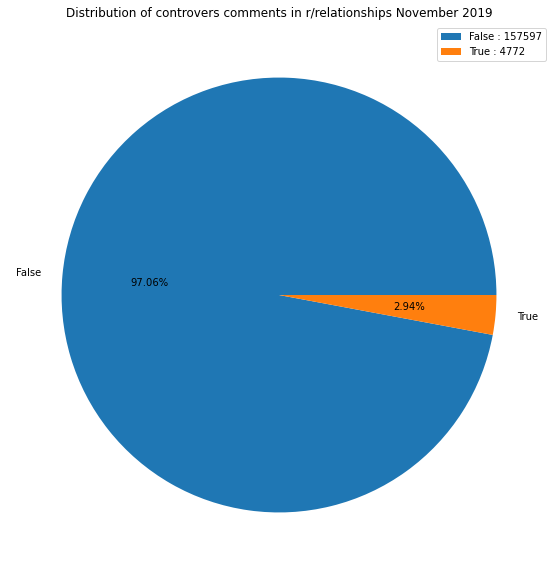

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 10))

# Plot Pie chart
pie_chart = df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%', legend=False)

# Get counts for each category
value_counts = df["controversiality"].value_counts()

# Create a custom legend with counts
legend_labels = [f'{value} : {count}' for value, count in zip(value_counts.index, value_counts)]
ax.legend(legend_labels, loc="upper right")

# Print the value counts
print(value_counts)

plt.title("Distribution of controvers comments in r/relationships November 2019")
plt.ylabel('')  # Remove y-axis label for clarity

# How many submissions (link_id)

In [7]:
total_submissions = df['link_id'].nunique()

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Einreichungen (Submissions): {total_submissions}')

Gesamtanzahl der Einreichungen (Submissions): 11006


# Which submission have the most interaction/comments

t3_dz6go1    810
t3_dvf5s1    808
t3_e02mzl    627
t3_dyck3j    586
t3_duiqnh    539
            ... 
t3_dslkzg      1
t3_e2k3pq      1
t3_dwyt4v      1
t3_e2kd4x      1
t3_e45sc8      1
Name: link_id, Length: 11006, dtype: int64


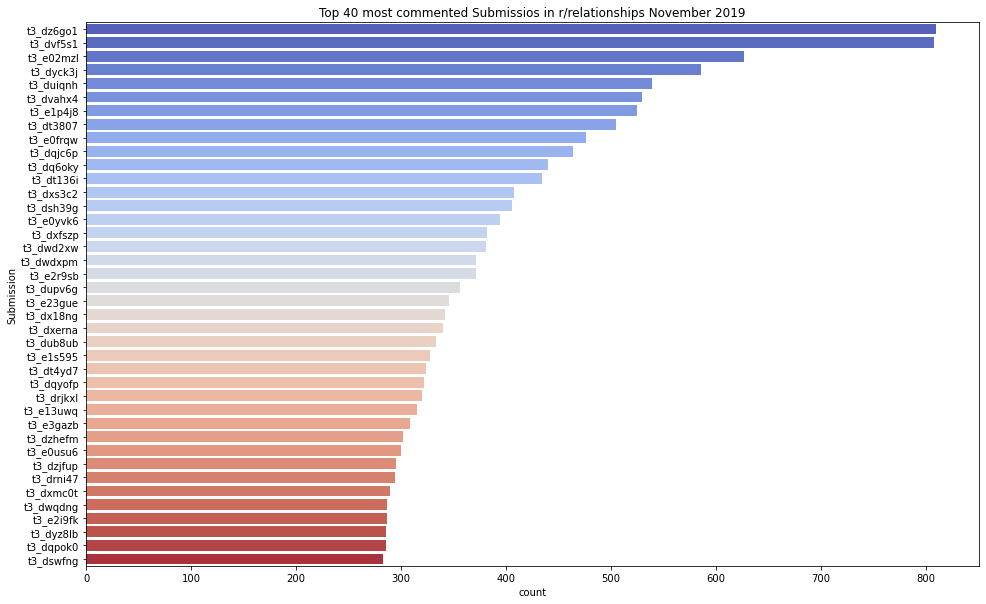

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index)

# Ändere die Beschriftung von "link_id" zu "Submission"
plt.ylabel("Submission")
plt.title("Top 40 most commented Submissios in r/relationships November 2019")

# Drucke die Wertezählungen für die neue Beschriftung
print(df["link_id"].value_counts())


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index, ax=ax)

# Ändere die Beschriftung von "link_id" zu "Submission"
ax.set_ylabel("Submission ID")
ax.set_xlabel("Number of Comments")
plt.title("Top 40 most commented Submissios in r/relationships November 2019")

# Anzeige der Anzahl in den Bars
for p in ax.patches:
    ax.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2 - 0.1, 
            f'{int(p.get_width())}', ha='center', va='center')

# Drucke die Wertezählungen für die neue Beschriftung
print(df["link_id"].value_counts())







t3_dz6go1    810
t3_dvf5s1    808
t3_e02mzl    627
t3_dyck3j    586
t3_duiqnh    539
            ... 
t3_dslkzg      1
t3_e2k3pq      1
t3_dwyt4v      1
t3_e2kd4x      1
t3_e45sc8      1
Name: link_id, Length: 11006, dtype: int64


# Average number of Comments per Submission per day

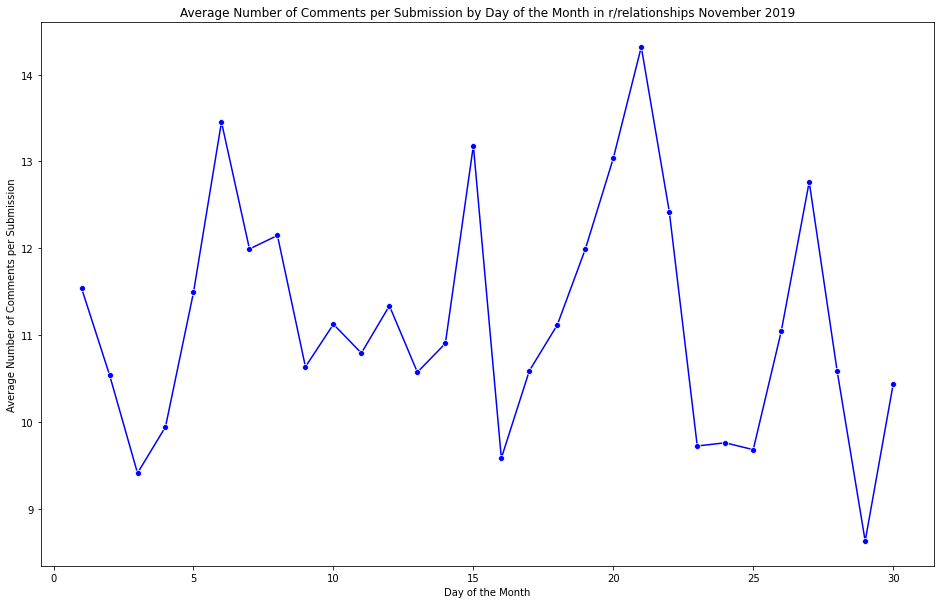

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Calculate the average number of comments per link_id for each day
avg_comments_per_link_id = df.groupby(['created_day', 'link_id']).size().groupby('created_day').mean().reset_index(name='avg_comments')

# Create the Line plot
fig = plt.figure(figsize=(16, 10))
sns.lineplot(data=avg_comments_per_link_id, x='created_day', y='avg_comments', marker='o', color='blue')

plt.title('Average Number of Comments per Submission by Day of the Month in r/relationships November 2019')
plt.xlabel('Day of the Month')
plt.ylabel('Average Number of Comments per Submission')
plt.show()


# Average number of Comments per Submission per h

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Calculate the average number of comments per link_id for each hour
avg_comments_per_link_id_hourly = df.groupby(['created_hour', 'link_id']).size().groupby('created_hour').mean().reset_index(name='avg_comments')

# Create the Line plot
fig = plt.figure(figsize=(16, 10))
sns.lineplot(data=avg_comments_per_link_id_hourly, x='created_hour', y='avg_comments', marker='o', color='blue')

plt.title('Average Number of Comments per Submission by Hour in r/relationships November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Comments per Submission')
plt.show()


# Author

# Who are the Authors/users with the most comments?

# With deleted

In [12]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="author", data=df, palette="coolwarm",
              order=df.author.value_counts().iloc[:20].index)
plt.xlabel("Number of Comments")
plt.ylabel("Author/User Name")
plt.title("Top 20 users with the most comments in r/relationships November 2019")


Text(0.5, 1.0, 'Top 20 users with the most comments in r/relationships November 2019')

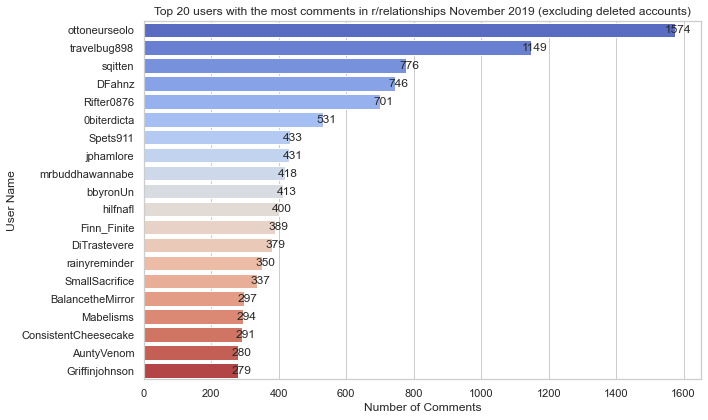

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits ein DataFrame mit einer "author" Spalte (z.B., df)

# Top 5 Autoren nach Anzahl der Kommentare auswählen und "[deleted]" entfernen
top_authors = df[df['author'] != '[deleted]']['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen (ohne "[deleted]")
top_comments = df[(df['author'].isin(top_authors)) & (df['author'] != '[deleted]')]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha='center', va='center')

plt.xlabel("Number of Comments")
plt.ylabel("User Name")
plt.title("Top 20 users with the most comments in r/relationships November 2019 (excluding deleted accounts)")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
plt.show()

In [14]:
total_author = df['author'].nunique()-1

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Authoren: {total_author}')

Gesamtanzahl der Authoren: 34332


In [15]:
# Group by "link_id" and count the number of comments per submission
submission_comment_counts = df.groupby('link_id')['body'].count()

# Calculate the average number of comments per submission
average_comments_per_submission = submission_comment_counts.mean()

# Display the result
print(f'Average number of comments per submission: {average_comments_per_submission:.2f}')

Average number of comments per submission: 14.75


In [16]:
# Group by "author" and count the number of comments per author
author_comment_counts = df.groupby('author')['body'].count()

# Calculate the average number of comments per author
average_comments_per_author = author_comment_counts.mean()

# Display the result
print(f'Average number of comments per author: {average_comments_per_author:.2f}')

Average number of comments per author: 4.73


# The average number of comments per author per hour

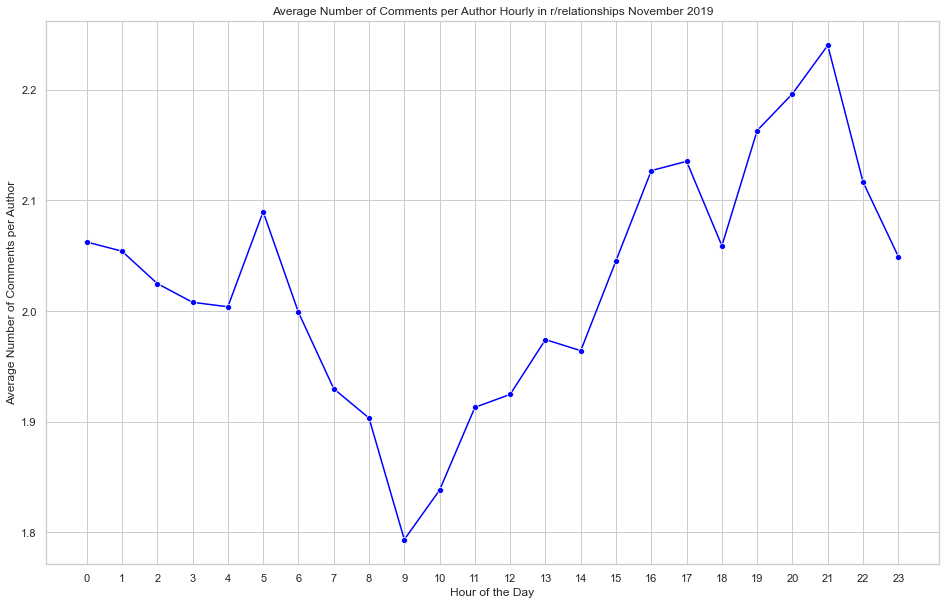

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Calculate the average number of comments per author for each hour
avg_comments_per_author_hourly = df.groupby(['created_hour', 'author']).size().groupby('created_hour').mean().reset_index()

# Create the Line plot
fig = plt.figure(figsize=(16, 10))
sns.lineplot(data=avg_comments_per_author_hourly, x='created_hour', y=0, marker='o', color='blue')

plt.title('Average Number of Comments per Author Hourly in r/relationships November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Comments per Author')
plt.xticks(range(24))  # Show all hour values
plt.show()


# The average number of comments per author per day

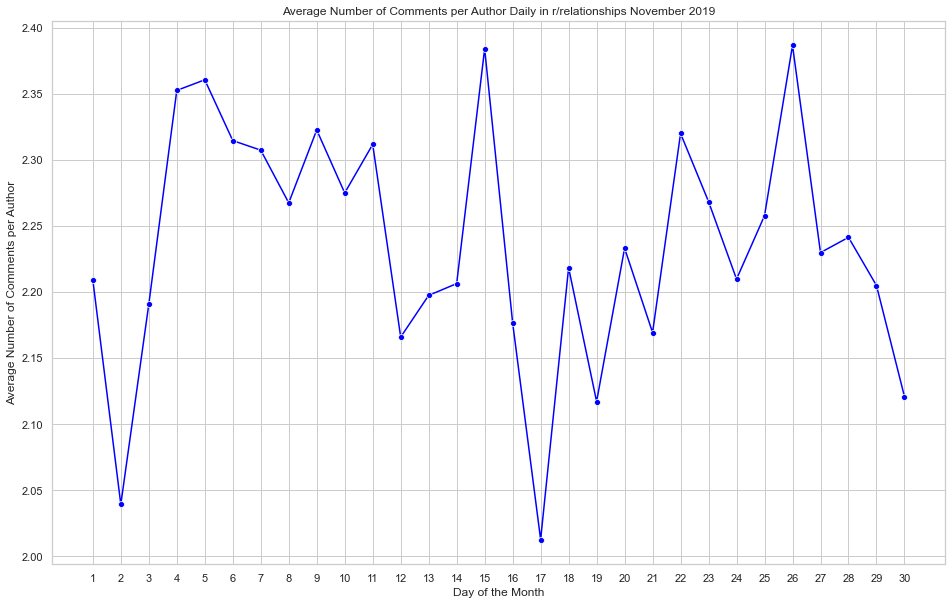

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Calculate the average number of comments per author for each day of the week
avg_comments_per_author_daily = df.groupby(['created_day', 'author']).size().groupby('created_day').mean().reset_index()

# Create the Line plot
fig = plt.figure(figsize=(16, 10))
sns.lineplot(data=avg_comments_per_author_daily, x='created_day', y=0, marker='o', color='blue')

plt.title('Average Number of Comments per Author Daily in r/relationships November 2019')
plt.xlabel('Day of the Month')
plt.ylabel('Average Number of Comments per Author')
plt.xticks(range(1, 31))  # Show all day values
plt.show()


# Number of comments per hour

([<matplotlib.axis.XTick at 0x7f847b3d1700>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

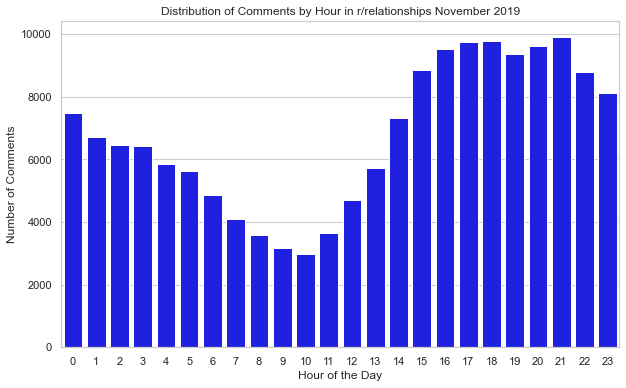

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Extract the hours from the "created_utc" column
# df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Create the Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Distribution of Comments by Hour in r/relationships November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Comments')
plt.xticks(range(24))  # Set x-axis to hours


# Number of comments per day

Text(0, 0.5, 'Number of Comments')

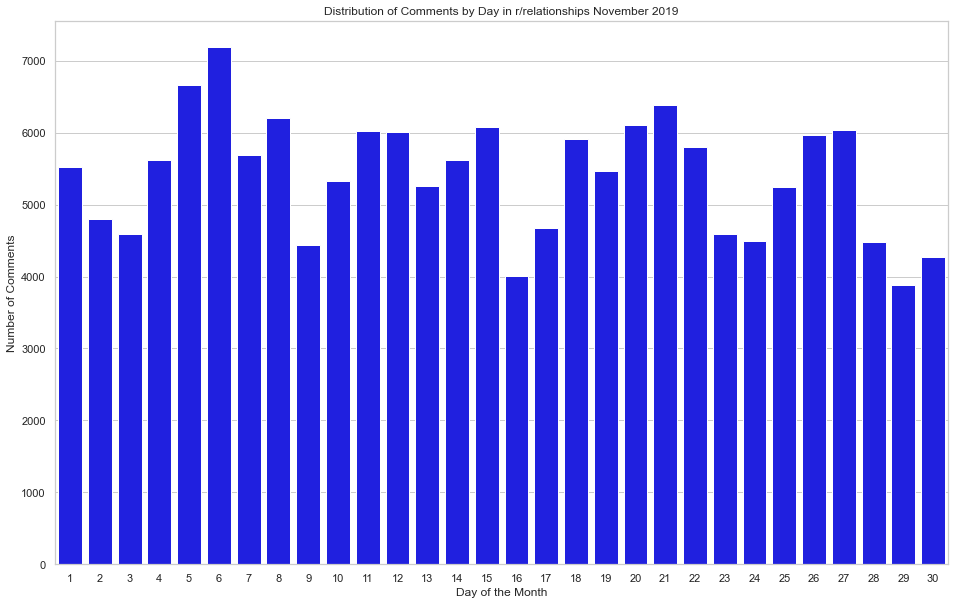

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Extract the hours from the "created_utc" column

# Create the Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Distribution of Comments by Day in r/relationships November 2019')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Comments')


# How many comments are Edited

In [21]:
df['edited'] = df['edited'].replace(0,"0")
df['edited'] = df['edited'].replace(1,"1")
df['edited'] = df['edited'].replace("0",False)
df['edited'] = df['edited'].replace("1",True)

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 10))

# Plot Pie chart
pie_chart = df['edited'].value_counts().plot(kind='pie', autopct='%1.2f%%', legend=False)

# Get counts for each category
value_counts = df['edited'].value_counts()

# Create a custom legend with counts
legend_labels = [f'{value} : {count}' for value, count in zip(value_counts.index, value_counts)]
ax.legend(legend_labels, loc="upper right")

# Print the value counts
print(value_counts)

plt.title("Distribution of Edited comments in r/relationships November 2019")
plt.ylabel('')  # Remove y-axis label for clarity


False    157962
True       4407
Name: edited, dtype: int64


Text(0, 0.5, '')

# Score Analysis

In [23]:
df["score"].mean()

13.161052910346188

In [24]:
top_10_scores = df.nlargest(10, 'score')
top_10_scores

author  Toxicity  Severe Toxicity  Profanity  \
56689      luiminescence  0.016462         0.000896   0.012756   
66664   PlentyGrapefruit  0.232350         0.006142   0.039407   
152750       black_rose_  0.390217         0.022452   0.306901   
109612     captainslowww  0.478864         0.023077   0.541926   
109724    Brooklyn_Bunny  0.280878         0.011139   0.106114   
66884         sleepfight  0.377512         0.020903   0.349693   
99802         sleepfight  0.030153         0.000811   0.013200   
55717   charliekindafine  0.106531         0.002918   0.022082   
92797    rootsandchalice  0.854047         0.451856   0.710732   
158767       Finn_Finite  0.061049         0.002689   0.024473   

        Identity Attack    Insult    Threat  \
56689          0.002516  0.009470  0.007237   
66664          0.012140  0.078720  0.012285   
152750         0.025404  0.068582  0.016465   
109612         0.010729  0.244933  0.008505   
109724         0.015456  0.081632  0.011483   
66884          0.016963  0.269578  0.009463   
99802          0.002053  0.012795  0.006285   
55717          0.006142  0.030375  0.011975   
92797          0.177699  0.727565  0.317217   
158767         0.006327  0.017679  0.009152   

                                                     body  controversiality  \
56689   You're lucky in many ways that you've got a ve...             False   
66664   make herself look good None of this makes her ...             False   
152750  To answer your specific question, which no one...             False   
109612  Whenever a roommate asks for this, they don't ...             False   
109724  Sounds like your BF’s roommate wants you to st...             False   
66884   I think rather than framing this as anything t...             False   
99802   Nope, nope, nope. He is not entitled to your b...             False   
55717   He literally said y'all have no future and he ...             False   
92797   What an asshole. Sorry. But your brother just ...             False   
158767  "I'm just too overwhelmed and I don't think I ...             False   

                created_utc  ...    link_id  parent_id score created_hour  \
56689   2019-11-11 02:26:28  ...  t3_duiqnh  t3_duiqnh  6951            2   
66664   2019-11-12 20:06:08  ...  t3_dvf5s1  t3_dvf5s1  6806           20   
152750  2019-11-28 17:17:48  ...  t3_e30c1l  t3_e30c1l  5710           17   
109612  2019-11-20 19:35:58  ...  t3_dz6go1  t3_dz6go1  5589           19   
109724  2019-11-20 19:50:49  ...  t3_dz6go1  t3_dz6go1  5293           19   
66884   2019-11-12 20:39:44  ...  t3_dvf5s1  t3_dvf5s1  5081           20   
99802   2019-11-19 00:42:41  ...  t3_dyck3j  t3_dyck3j  4697            0   
55717   2019-11-10 22:42:17  ...  t3_duiqnh  t3_duiqnh  4369           22   
92797   2019-11-17 20:38:53  ...  t3_dxs3c2  t3_dxs3c2  4255           20   
158767  2019-11-30 03:57:56  ...  t3_e3q9bo  t3_e3q9bo  4249            3   

       created_day  created_year  \
56689           11          2019   
66664           12          2019   
152750          28          2019   
109612          20          2019   
109724          20          2019   
66884           12          2019   
99802           19          2019   
55717           10          2019   
92797           17          2019   
158767          30          2019   

                                               clean_text  comment_len  \
56689   You re lucky in many ways that you ve got a ve...           23   
66664   make herself look good None of this makes her ...           12   
152750  To answer your specific question which no one ...          313   
109612  Whenever a roommate asks for this they don t r...           27   
109724  Sounds like your BF s roommate wants you to st...           14   
66884   I think rather than framing this as anything t...          134   
99802   Nope nope nope . He is not entitled to your ba...           72   
55717   He literally said y all have no future and he ...         

In [25]:
bottom_10_scores = df.nsmallest(10, 'score')
bottom_10_scores

author  Toxicity  Severe Toxicity  Profanity  \
104367  Agreeable-Spare  0.110473         0.002012   0.019007   
37383    OutsideBobcat8  0.156009         0.006371   0.058446   
104474  Agreeable-Spare  0.044142         0.001678   0.025498   
37333    OutsideBobcat8  0.156009         0.006371   0.058446   
104288  Agreeable-Spare  0.036870         0.001783   0.028504   
1760    Von_Wallenstein  0.200795         0.005035   0.109828   
133265           CKFS87  0.073711         0.001240   0.015660   
43776         [deleted]  0.168519         0.004864   0.072236   
138732        tooMUCHOj  0.172851         0.001726   0.029050   
58499      GemelloBello  0.950486         0.458954   0.934264   

        Identity Attack    Insult    Threat  \
104367         0.006438  0.038859  0.006991   
37383          0.005994  0.023093  0.132794   
104474         0.009064  0.017937  0.007094   
37333          0.005994  0.023093  0.132794   
104288         0.004958  0.011845  0.006991   
1760           0.011987  0.085334  0.008738   
133265         0.005032  0.029494  0.007858   
43776          0.017867  0.074285  0.009670   
138732         0.002460  0.086853  0.006117   
58499          0.064314  0.501549  0.024235   

                                                     body  controversiality  \
104367  With all due respect, as i said up there, i do...             False   
37383   I didn't tackle her though, like you would in ...             False   
104474  guys have tendencies to get what they want. i ...             False   
37333   I didn't tackle her though, like you would in ...             False   
104288  I understand, but my daughter is a very "secre...             False   
1760    Maybe try talking to them first see what try h...             False   
133265  So many snarky answers. Give the dad a chance....             False   
43776   I think it was more naive and reckless on his ...             False   
138732  Excuse me? Building a shed and refurbishing ol...             False   
58499   Fuck this. You don't force the man you love to...             False   

                created_utc  ...    link_id   parent_id score created_hour  \
104367  2019-11-19 21:28:07  ...  t3_dyqnv6  t1_f82v1w8  -225           21   
37383   2019-11-07 17:57:19  ...  t3_dszukr  t1_f6t9lik  -211           17   
104474  2019-11-19 21:44:34  ...  t3_dyqnv6  t1_f82weec  -185           21   
37333   2019-11-07 17:48:11  ...  t3_dszukr  t1_f6teccs  -175           17   
104288  2019-11-19 21:15:41  ...  t3_dyqnv6  t1_f82thk7  -175           21   
1760    2019-11-01 12:34:58  ...  t3_dpzgrp  t1_f5zp0jq  -167           12   
133265  2019-11-25 02:46:32  ...  t3_e13uwq  t1_f8no42v  -163            2   
43776   2019-11-08 16:58:11  ...  t3_dtgxw2  t1_f6wpd9n  -158           16   
138732  2019-11-26 03:26:25  ...  t3_e1p4j8  t1_f8r66a1  -153            3   
58499   2019-11-11 12:00:46  ...  t3_duh36p  t1_f770lka  -140           12   

       created_day  created_year  \
104367          19          2019   
37383            7          2019   
104474          19          2019   
37333            7          2019   
104288          19          2019   
1760             1          2019   
133265          25          2019   
43776            8          2019   
138732          26          2019   
58499           11          2019   

                                               clean_text  comment_len  \
104367  With all due respect as i said up there i dont...           52   
37383   I didn t tackle her though like you would in r...           51   
104474  guys have tendencies to get what they want . i...           35   
37333   I didn t tackle her though like you would in r...           51   
104288  I understand but my daughter is a very secreti...           73   
1760    Maybe try talking to them first see what try h...           88   
133265  So many snarky answers . Give the dad a chance...           28   
43776   I think it was more naive and reckless on his ...        

# On which hour the scores are the highes or lowest

Text(0, 0.5, 'Average Score')

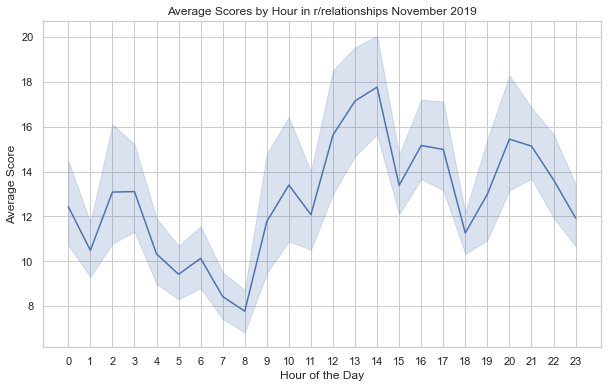

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))

# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="score")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Hour in r/relationships November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Score')




([<matplotlib.axis.XTick at 0x7f847a30cd90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

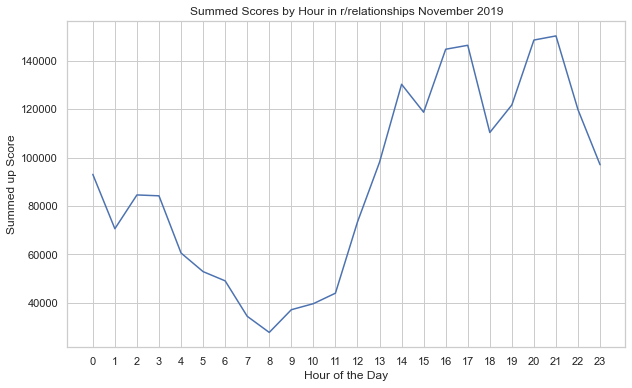

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_hour")["score"].sum().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_hour", y="score")

plt.title('Summed Scores by Hour in r/relationships November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Summed up Score')
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an



# On which day the scores are the highes or lowest

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))

# Plot Line chart
sns.lineplot(data=df, x="created_day", y="score")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Day in r/relationships November 2019')
plt.xlabel('Day of the Month')
plt.ylabel('Average Score')

Text(0, 0.5, 'Average Score')

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_day")["score"].sum().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_day", y="score")

plt.title('Summed up Scores by Day in r/relationships November 2019')
plt.xlabel('Day of the Month')
plt.ylabel('Summed up Score')
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

([<matplotlib.axis.XTick at 0x7f843c6beeb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

# Which Author have the most scores

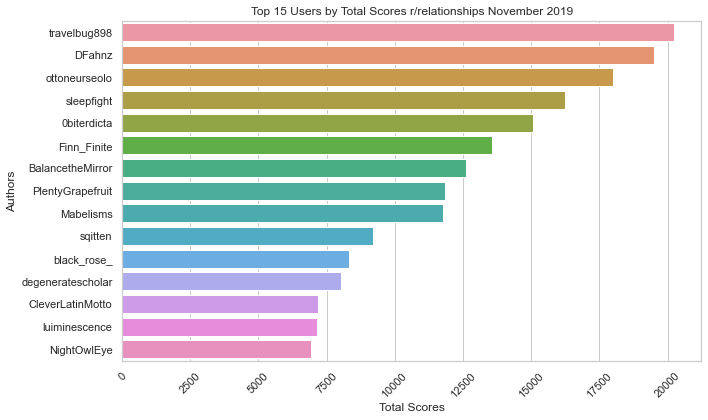

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is your DataFrame with the corresponding columns
# Make sure to use the same DataFrame name

# Group authors by total scores
author_scores = df.groupby('author')['score'].sum()

# Sort authors by total scores in descending order
sorted_authors = author_scores.sort_values(ascending=False)

# Remove the first author from the sorted list
sorted_authors = sorted_authors.iloc[2:]

# Select the top 15 authors
top_authors = sorted_authors.head(15)

# Create a plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Users by Total Scores r/relationships November 2019')
plt.xlabel("Total Scores")
plt.ylabel("Authors")
plt.xticks(rotation=45)
plt.tight_layout()


# Sind Leute die mehr Edited mehr negative?

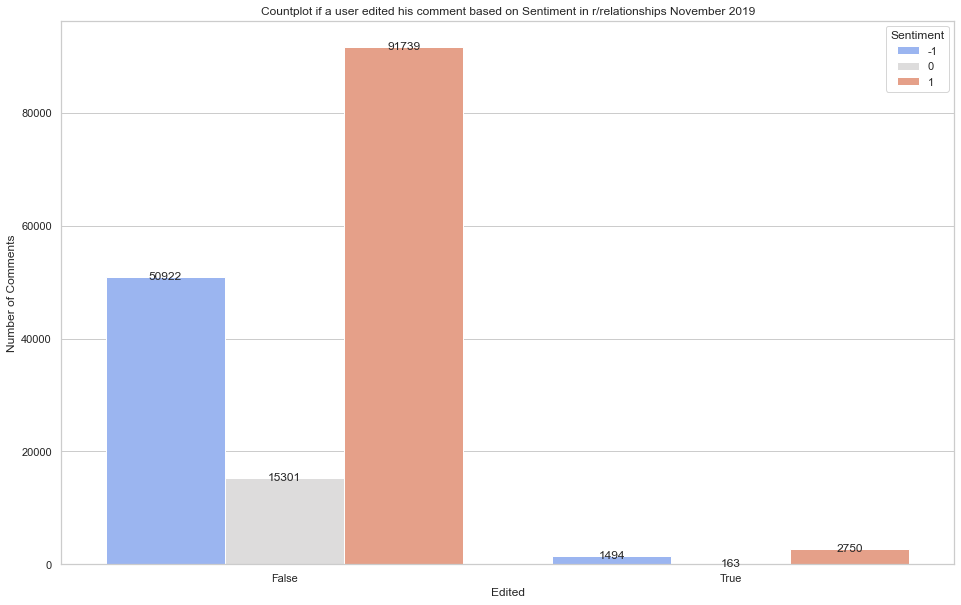

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16, 10))

# Count the values and create a bar plot
sns.countplot(data=df, x='edited', palette='coolwarm', ax=ax,hue="Sentiment")

# Add labels
plt.title('Countplot if a user edited his comment based on Sentiment in r/relationships November 2019')
plt.xlabel('Edited')
plt.ylabel('Number of Comments')

# Display the count above the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.1,
            f'{int(p.get_height())}', ha='center', va='center')

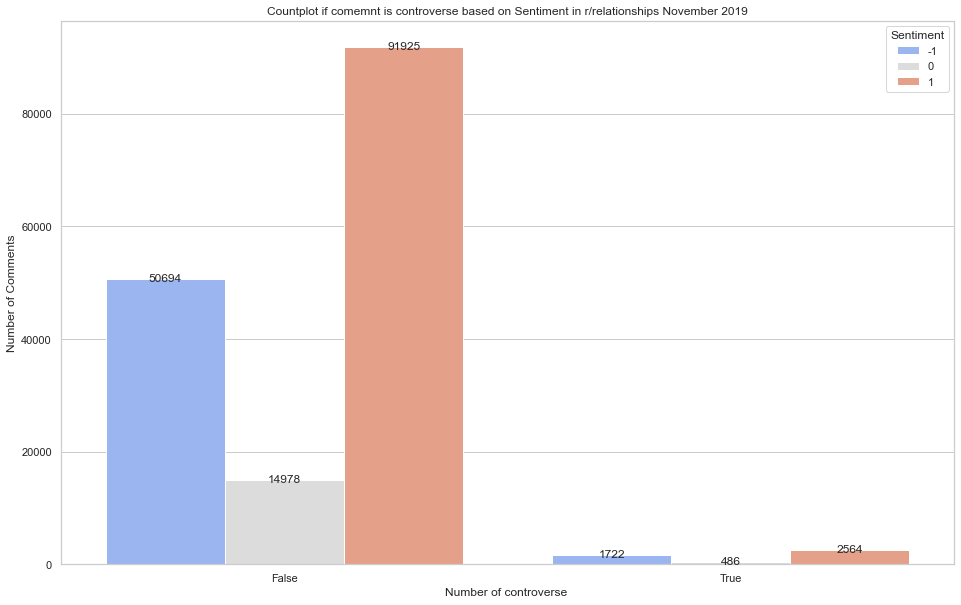

In [32]:

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16, 10))

# Count the values and create a bar plot
sns.countplot(data=df, x='controversiality', palette='coolwarm', ax=ax,hue="Sentiment")

# Add labels
plt.title('Countplot if comemnt is controverse based on Sentiment in r/relationships November 2019')
plt.xlabel('Number of controverse ')
plt.ylabel('Number of Comments')

# Display the count above the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.1,
            f'{int(p.get_height())}', ha='center', va='center')

# Sentiment  Analyses

# Durchschnittliche Vader Sentiment score für 2019

In [33]:
df["compound"].mean()

0.19806748209326144

# Vader Sentiment coutplot

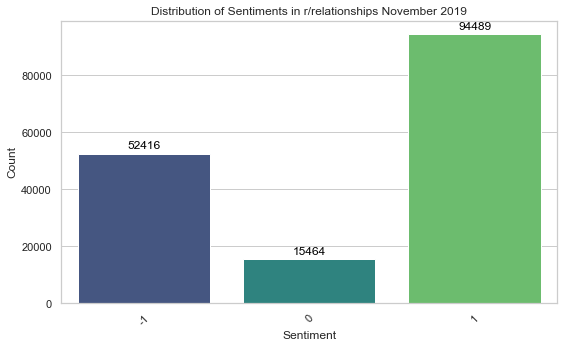

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Sentiment' column has already been created as described in the previous code.

# Create the Countplot for Sentiments
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiments in r/relationships November 2019')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add the count above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()


# Prozentuale Verteilung von Vader Sentiment

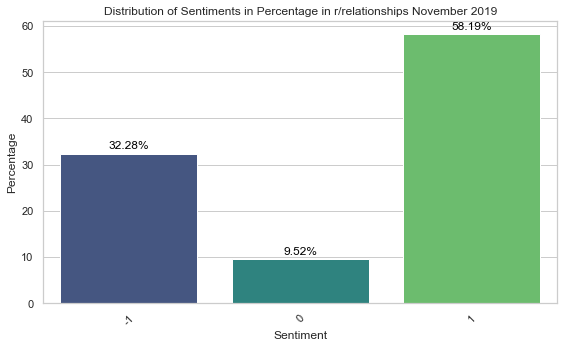

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Sentiment' column has already been created as described in the previous code.

# Calculate the percentage for each sentiment
sentiment_counts = df['Sentiment'].value_counts(normalize=True) * 100

# Create the bar plot for Sentiments in percentage
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiments in Percentage in r/relationships November 2019')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Add the percentage above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()

# Verteilung des Compound scores

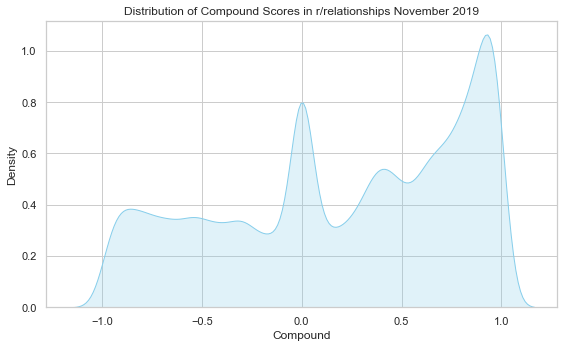

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the KDE plot for the 'compound' column
plt.figure(figsize=(8, 5))
sns.kdeplot(df['compound'], shade=True, color='skyblue')
plt.title('Distribution of Compound Scores in r/relationships November 2019')
plt.xlabel('Compound')
plt.ylabel('Density')
plt.tight_layout()

# An welchen Tag sind die Kommentare durchschnittlich am negativsten bzw positivesten

([<matplotlib.axis.XTick at 0x7f847ab0db20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

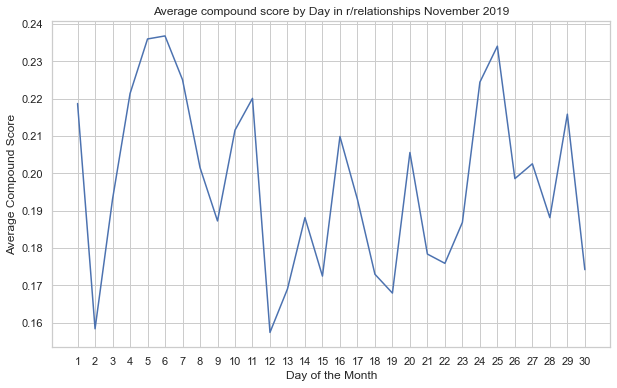

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_day")['compound'].mean().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_day", y="compound")

plt.title('Average compound score by Day in r/relationships November 2019')
plt.xlabel('Day of the Month')
plt.ylabel('Average Compound Score')
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

# An welcher stunde sind die Kommentare im durchschnitt am negativsten oder positivsten

([<matplotlib.axis.XTick at 0x7f84791001f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

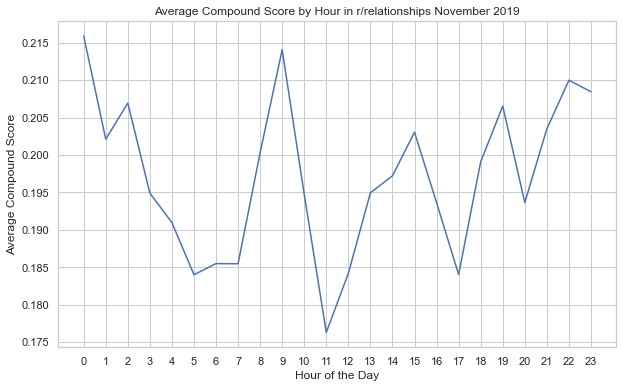

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_hour")['compound'].mean().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_hour", y="compound")

plt.title('Average Compound Score by Hour in r/relationships November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel("Average Compound Score")
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

# Zu welcher Zeit haben negative, positive und neutrale kommentare im Durchschnitt den höchsten scoren

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="score",hue="Sentiment",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Hour in r/relationships November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Score')

Text(0, 0.5, 'Average Score')

Text(0, 0.5, 'Average Score')

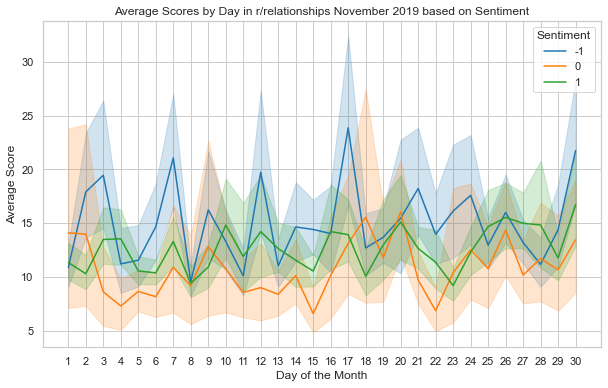

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="score",hue="Sentiment",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Day in r/relationships November 2019 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Average Score')


Text(0, 0.5, 'Average Score')

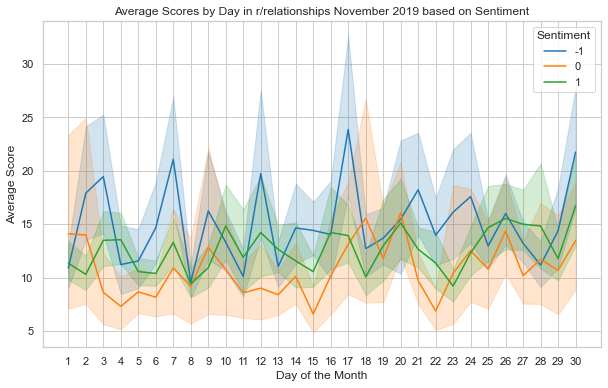

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="score",hue="Sentiment",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Day in r/relationships November 2019 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Average Score')

Text(0, 0.5, 'Summed up Score')

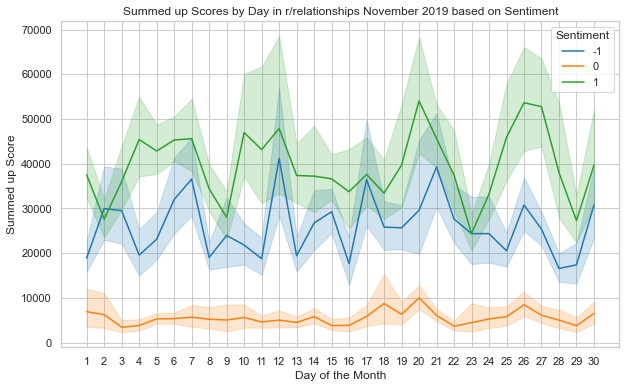

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart and use the "sum" function for the Y-axis
sns.lineplot(data=df, x="created_day", y="score", hue="Sentiment", palette="tab10", estimator=sum)

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Show all hour values

plt.title('Summed up Scores by Day in r/relationships November 2019 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Summed up Score')

<AxesSubplot:xlabel='Sentiment', ylabel='score'>

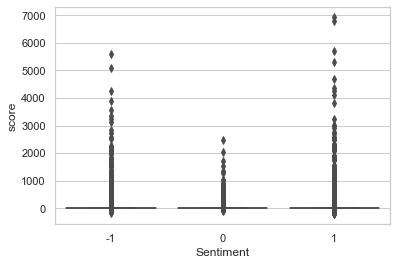

In [43]:
sns.boxplot(data=df, y="score", x="Sentiment")

<AxesSubplot:xlabel='Sentiment', ylabel='comment_len'>

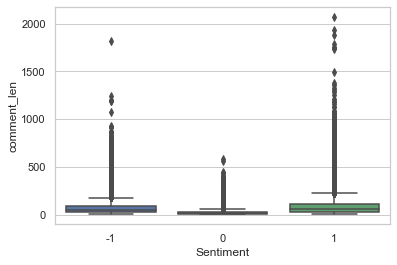

In [44]:
sns.boxplot(data=df, y="comment_len", x="Sentiment")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162369 entries, 0 to 162368
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   author            162369 non-null  object 
 1   Toxicity          161617 non-null  float64
 2   Severe Toxicity   161617 non-null  float64
 3   Profanity         161617 non-null  float64
 4   Identity Attack   161617 non-null  float64
 5   Insult            161617 non-null  float64
 6   Threat            161617 non-null  float64
 7   body              162369 non-null  object 
 8   controversiality  162369 non-null  bool   
 9   created_utc       162369 non-null  object 
 10  edited            162369 non-null  bool   
 11  gilded            162369 non-null  int64  
 12  id                162369 non-null  object 
 13  link_id           162369 non-null  object 
 14  parent_id         162369 non-null  object 
 15  score             162369 non-null  int64  
 16  created_hour      16

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162369 entries, 0 to 162368
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   author            162369 non-null  object 
 1   Toxicity          161617 non-null  float64
 2   Severe Toxicity   161617 non-null  float64
 3   Profanity         161617 non-null  float64
 4   Identity Attack   161617 non-null  float64
 5   Insult            161617 non-null  float64
 6   Threat            161617 non-null  float64
 7   body              162369 non-null  object 
 8   controversiality  162369 non-null  bool   
 9   created_utc       162369 non-null  object 
 10  edited            162369 non-null  bool   
 11  gilded            162369 non-null  int64  
 12  id                162369 non-null  object 
 13  link_id           162369 non-null  object 
 14  parent_id         162369 non-null  object 
 15  score             162369 non-null  int64  
 16  created_hour      16

# Comment lengt

In [47]:
df["comment_len"].mean()

73.41632331294767

In [48]:
df["comment_len"].median()

48.0

([<matplotlib.axis.XTick at 0x7f843d2d64c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

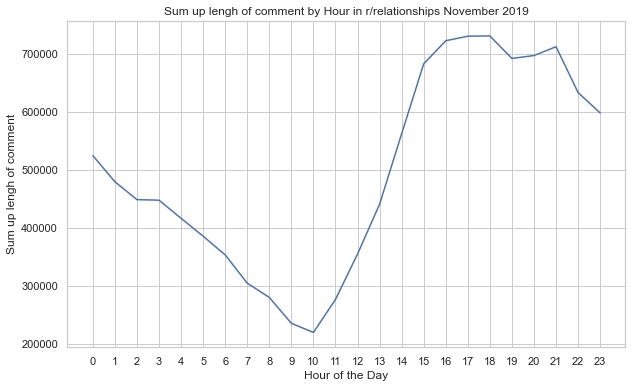

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_hour")["comment_len"].sum().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_hour", y="comment_len")

plt.title('Sum up lengh of comment by Hour in r/relationships November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Sum up lengh of comment')
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

([<matplotlib.axis.XTick at 0x7f844ade7f10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

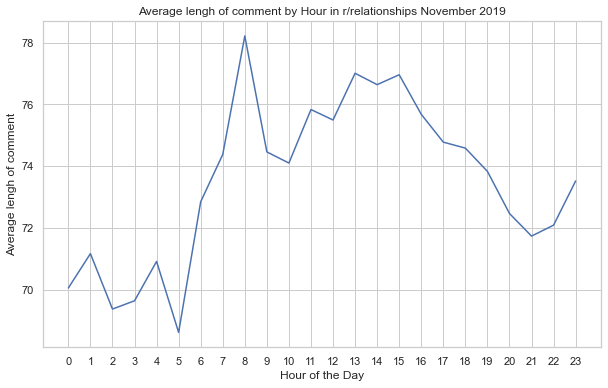

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_hour")["comment_len"].mean().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_hour", y="comment_len")

plt.title('Average lengh of comment by Hour in r/relationships November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average lengh of comment')
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

Text(0, 0.5, 'Average Comment Length')

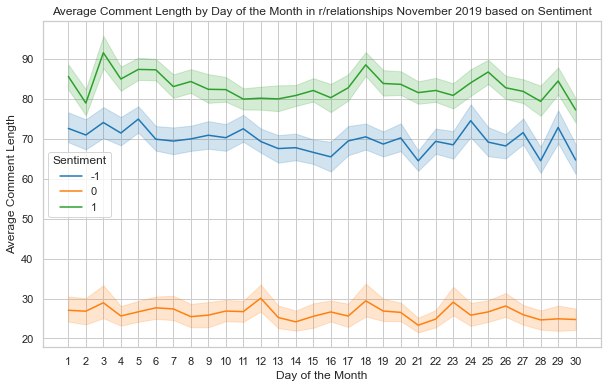

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart for comment length
sns.lineplot(data=df, x="created_day", y="comment_len", hue="Sentiment", palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Show all day values

plt.title('Average Comment Length by Day of the Month in r/relationships November 2019 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Average Comment Length')



Text(0, 0.5, 'Average Comment Length')

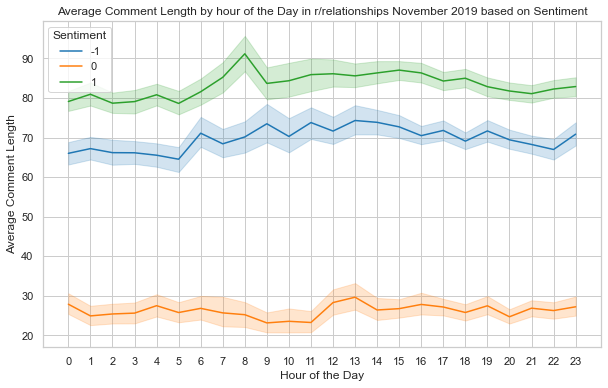

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart for comment length
sns.lineplot(data=df, x="created_hour", y="comment_len", hue="Sentiment", palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Show all day values

plt.title('Average Comment Length by hour of the Day in r/relationships November 2019 based on Sentiment')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Comment Length')

Text(0, 0.5, 'Summed up Comment length')

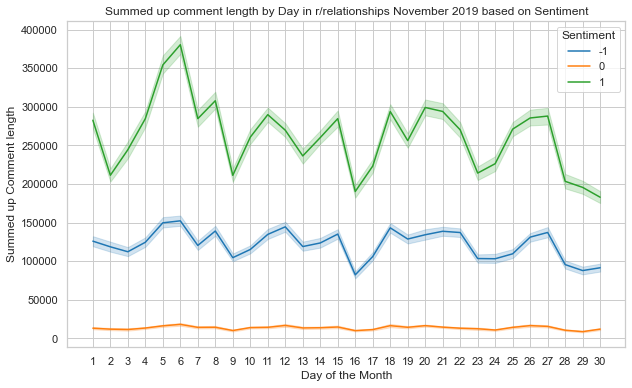

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart and use the "sum" function for the Y-axis
sns.lineplot(data=df, x="created_day", y="comment_len", hue="Sentiment", palette="tab10", estimator=sum)

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Show all hour values

plt.title('Summed up comment length by Day in r/relationships November 2019 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Summed up Comment length')

Text(0, 0.5, 'Summed up Comment length')

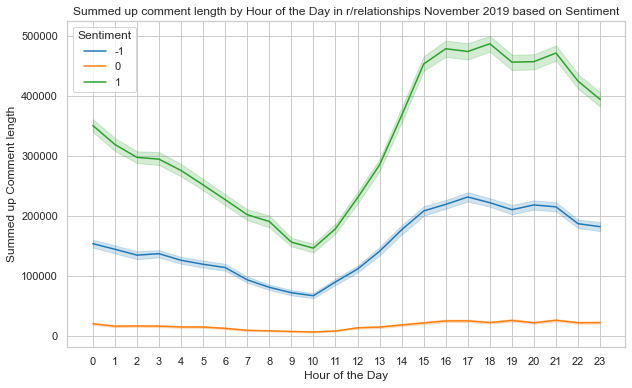

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart and use the "sum" function for the Y-axis
sns.lineplot(data=df, x="created_hour", y="comment_len", hue="Sentiment", palette="tab10", estimator=sum)

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Show all hour values

plt.title('Summed up comment length by Hour of the Day in r/relationships November 2019 based on Sentiment')
plt.xlabel('Hour of the Day')
plt.ylabel('Summed up Comment length')

Text(0, 0.5, 'Summed up Comment length')

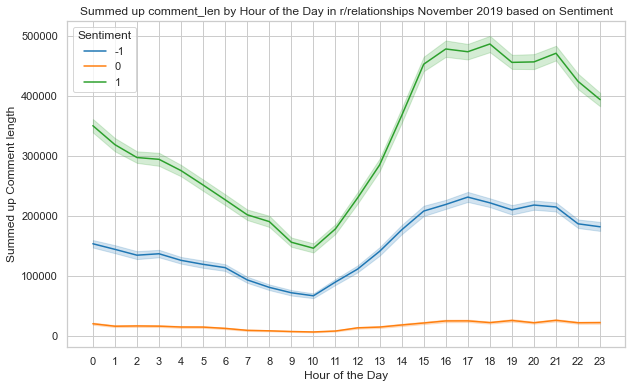

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart and use the "sum" function for the Y-axis
sns.lineplot(data=df, x="created_hour", y="comment_len", hue="Sentiment", palette="tab10", estimator=sum)

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Show all hour values

plt.title('Summed up comment_len by Hour of the Day in r/relationships November 2019 based on Sentiment')
plt.xlabel('Hour of the Day')
plt.ylabel('Summed up Comment length')

# Toxicity 

In [56]:
import pandas as pd

# Annahme: DataFrame df enthält die Spalten "comment_len", "compound" und "Toxicity"

# Filtere die Zeilen, in denen "Toxicity" keinen Wert hat
filtered_df = df[df['Toxicity'].isnull()]

# Berechne den Durchschnitt von "comment_len" und "compound" für die gefilterten Zeilen
mean_comment_len = filtered_df['comment_len'].mean()
mean_compound_score = filtered_df['compound'].mean()

print(f'Mean Comment Length (where Toxicity is null): {mean_comment_len}')
print(f'Mean Compound Score (where Toxicity is null): {mean_compound_score}')


Mean Comment Length (where Toxicity is null): 6.013297872340425
Mean Compound Score (where Toxicity is null): 0.14403204787234036


Text(0, 0.5, 'Count')

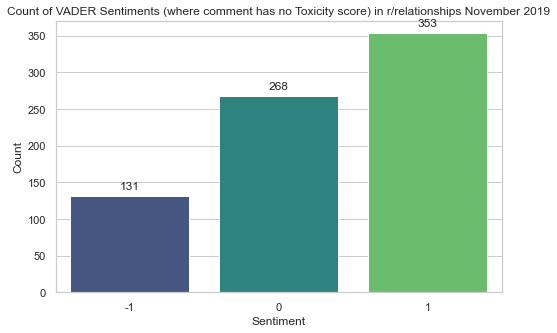

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Annahme: filtered_df ist dein gefiltertes DataFrame mit der Spalte "sentiment"

# Erstelle das Countplot für die Spalte "sentiment"
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=filtered_df, x='Sentiment', palette='viridis')

# Beschrifte die Balken mit den genauen Zahlen
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Count of VADER Sentiments (where comment has no Toxicity score) in r/relationships November 2019')
plt.xlabel('Sentiment')
plt.ylabel('Count')





Text(0, 0.5, 'Percentage')

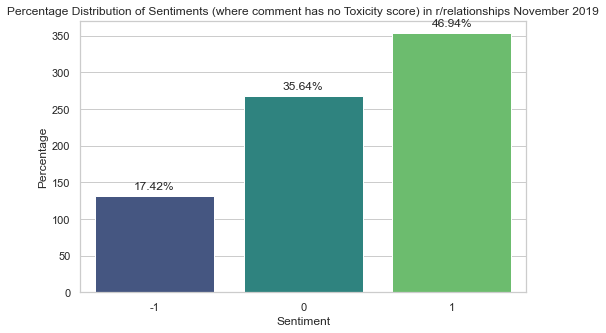

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Annahme: filtered_df ist dein gefiltertes DataFrame mit der Spalte "Sentiment"

# Berechne die prozentualen Anteile für jeden Sentiment-Wert
total_count = len(filtered_df)
percentages = (filtered_df['Sentiment'].value_counts() / total_count) * 100

# Erstelle das Countplot für die Spalte "Sentiment"
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=filtered_df, x='Sentiment', palette='viridis')

# Beschrifte die Balken mit den prozentualen Anteilen
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total_count * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Percentage Distribution of Sentiments (where comment has no Toxicity score) in r/relationships November 2019')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')




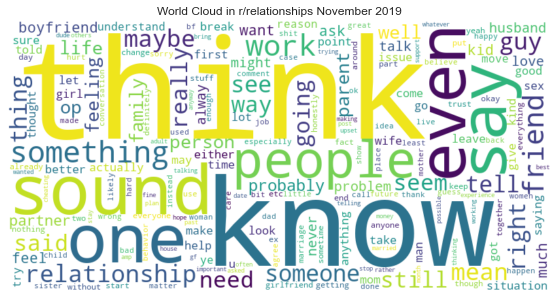

Text(0, 0.5, 'Count')

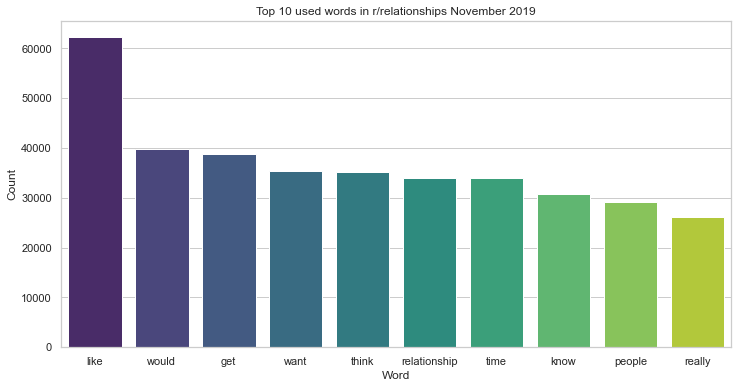

In [59]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import seaborn as sns

# Assuming you already have a DataFrame named "df" with a column named "body"
# Make sure that nltk, wordcloud, seaborn, and matplotlib are installed
# Install them with: pip install nltk wordcloud seaborn matplotlib

# Load English stopwords
stop_words = set(stopwords.words("english"))

# Combine all texts in the "body" column into a single text and remove stopwords
df["body_clean"] = df["clean_text"].apply(lambda x: " ".join([word.lower() for word in word_tokenize(str(x)) if word.isalpha() and word.lower() not in stop_words]))

# Combine all cleaned texts into a single text
text = " ".join(df["body_clean"])

# Create the Word Cloud using the WordCloud library
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.title("World Cloud in r/relationships November 2019")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Create a Countplot for the Top 10 words
top_words = Counter(text.split()).most_common(10)
top_words_df = pd.DataFrame(top_words, columns=["Word", "Count"])

plt.figure(figsize=(12, 6))
sns.barplot(x="Word", y="Count", data=top_words_df, palette="viridis")
plt.title("Top 10 used words in r/relationships November 2019")
plt.xlabel("Word")
plt.ylabel("Count")



# Toxicity Analyses

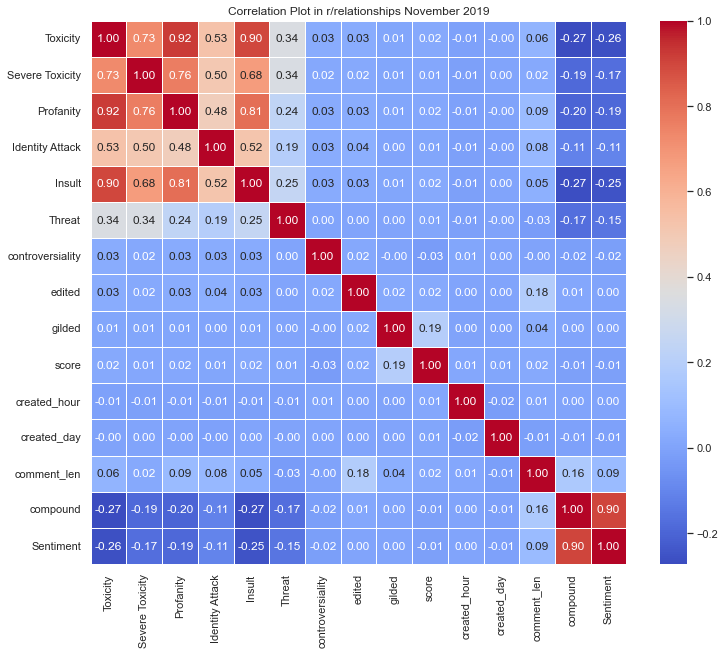

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Annahme: df ist dein DataFrame

# Entferne die Spalten created_year, created_hour, und created_day
columns_to_exclude = ['created_year']
df_filtered = df.drop(columns=columns_to_exclude, errors='ignore')

# Berechne die Korrelationsmatrix
correlation_matrix = df_filtered.corr()

# Erstelle den Korrelationsplot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Plot in r/relationships November 2019')
plt.show()

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162369 entries, 0 to 162368
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   author            162369 non-null  object 
 1   Toxicity          161617 non-null  float64
 2   Severe Toxicity   161617 non-null  float64
 3   Profanity         161617 non-null  float64
 4   Identity Attack   161617 non-null  float64
 5   Insult            161617 non-null  float64
 6   Threat            161617 non-null  float64
 7   body              162369 non-null  object 
 8   controversiality  162369 non-null  bool   
 9   created_utc       162369 non-null  object 
 10  edited            162369 non-null  bool   
 11  gilded            162369 non-null  int64  
 12  id                162369 non-null  object 
 13  link_id           162369 non-null  object 
 14  parent_id         162369 non-null  object 
 15  score             162369 non-null  int64  
 16  created_hour      16

In [62]:
import pandas as pd

# Angenommen, df ist dein DataFrame
# Wähle die relevanten Spalten aus
selected_columns = ['Toxicity', 'Severe Toxicity', 'Profanity', 'Identity Attack', 'Insult', 'Threat']

# Erstelle eine neue Spalte für jeden Wert >= 0.7 (1 für True, 0 für False)
df['Toxicity_0.7_or_higher'] = (df['Toxicity'] >= 0.7).astype(int)
df['Severe_Toxicity_0.7_or_higher'] = (df['Severe Toxicity'] >= 0.7).astype(int)
df['Profanity_0.7_or_higher'] = (df['Profanity'] >= 0.7).astype(int)
df['Identity_Attack_0.7_or_higher'] = (df['Identity Attack'] >= 0.7).astype(int)
df['Insult_0.7_or_higher'] = (df['Insult'] >= 0.7).astype(int)
df['Threat_0.7_or_higher'] = (df['Threat'] >= 0.7).astype(int)

# Summiere die Anzahl der 1en für jede Spalte
count_toxicity = df['Toxicity_0.7_or_higher'].sum()
count_severe_toxicity = df['Severe_Toxicity_0.7_or_higher'].sum()
count_profanity = df['Profanity_0.7_or_higher'].sum()
count_identity_attack = df['Identity_Attack_0.7_or_higher'].sum()
count_insult = df['Insult_0.7_or_higher'].sum()
count_threat = df['Threat_0.7_or_higher'].sum()

# Drucke die Ergebnisse
print(f'Count of Toxicity >= 0.7: {count_toxicity}')
print(f'Count of Severe Toxicity >= 0.7: {count_severe_toxicity}')
print(f'Count of Profanity >= 0.7: {count_profanity}')
print(f'Count of Identity Attack >= 0.7: {count_identity_attack}')
print(f'Count of Insult >= 0.7: {count_insult}')
print(f'Count of Threat >= 0.7: {count_threat}')


Count of Toxicity >= 0.7: 5584
Count of Severe Toxicity >= 0.7: 8
Count of Profanity >= 0.7: 5373
Count of Identity Attack >= 0.7: 5
Count of Insult >= 0.7: 1141
Count of Threat >= 0.7: 12


In [63]:
import pandas as pd

# Angenommen, df ist dein DataFrame
# Wähle die relevanten Spalten aus
selected_columns = ['Toxicity', 'Severe Toxicity', 'Profanity', 'Identity Attack', 'Insult', 'Threat']

# Erstelle eine neue Spalte für jeden Wert >= 0.7 (1 für True, 0 für False)
for col in selected_columns:
    df[f'{col}_0.7_or_higher'] = (df[col] >= 0.7).astype(int)

# Summiere die Anzahl der 1en für jede Spalte
counts = df[[f'{col}_0.7_or_higher' for col in selected_columns]].sum()

# Berechne den Prozentsatz im Verhältnis zur Gesamtanzahl der Zeilen
total_rows = len(df)
percentages = counts / total_rows * 100

# Drucke die prozentualen Ergebnisse
for col, percentage in zip(selected_columns, percentages):
    print(f'Percentage of {col} >= 0.7: {percentage:.3f}%')


Percentage of Toxicity >= 0.7: 3.439%
Percentage of Severe Toxicity >= 0.7: 0.005%
Percentage of Profanity >= 0.7: 3.309%
Percentage of Identity Attack >= 0.7: 0.003%
Percentage of Insult >= 0.7: 0.703%
Percentage of Threat >= 0.7: 0.007%


Text(0, 0.5, 'Average Toxicity Score')

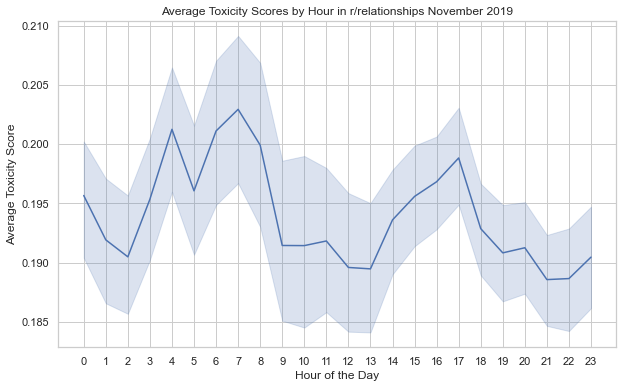

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Toxicity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Toxicity Scores by Hour in r/relationships November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Toxicity Score')

Text(0, 0.5, 'Average Toxicity Score')

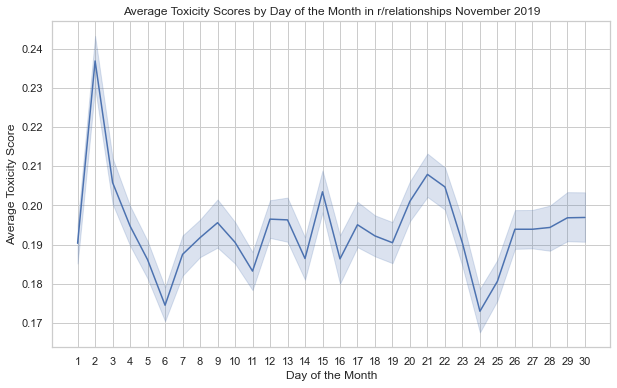

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Toxicity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Toxicity Scores by Day of the Month in r/relationships November 2019')
plt.xlabel("Day of the Month")
plt.ylabel('Average Toxicity Score')

# Severe Toxicity

Text(0, 0.5, 'Average Severe Toxicity Score')

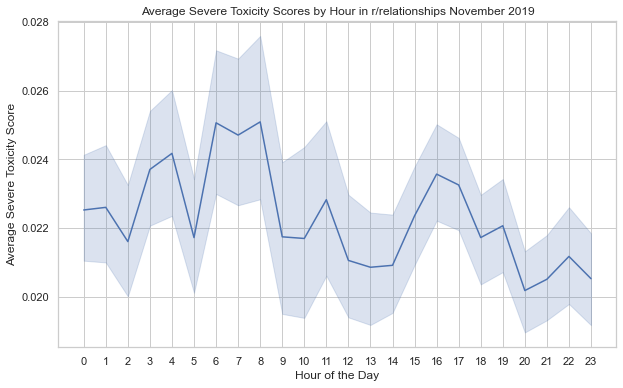

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Severe Toxicity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Severe Toxicity Scores by Hour in r/relationships November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Severe Toxicity Score')

Text(0, 0.5, 'Average Severe Toxicity Score')

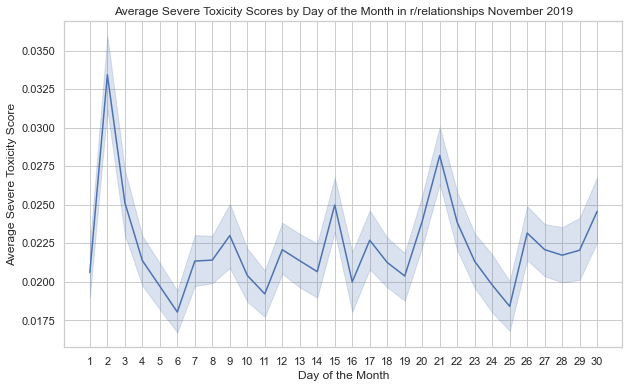

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Severe Toxicity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Severe Toxicity Scores by Day of the Month in r/relationships November 2019')
plt.xlabel("Day of the Month")
plt.ylabel('Average Severe Toxicity Score')

# Profanity

Text(0, 0.5, 'Average Profanity Score')

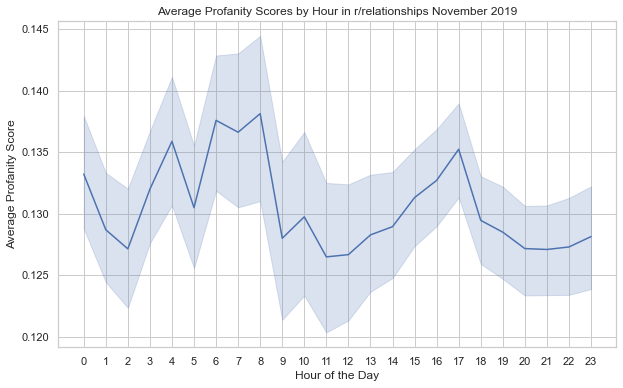

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Profanity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Profanity Scores by Hour in r/relationships November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Profanity Score')

Text(0, 0.5, 'Average Profanity Score')

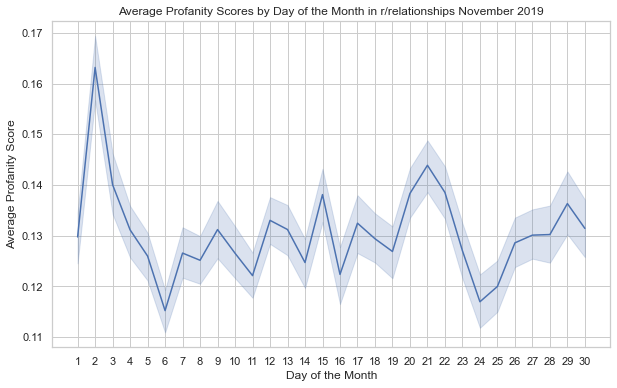

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Profanity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Profanity Scores by Day of the Month in r/relationships November 2019')
plt.xlabel("Day of the Month")
plt.ylabel('Average Profanity Score')

# Identity Attack

Text(0, 0.5, 'Average Identity Attack Score')

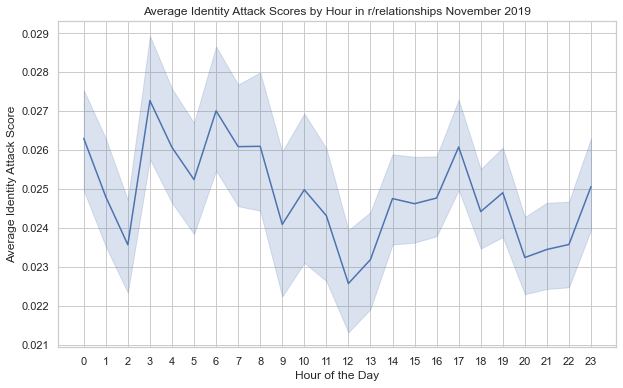

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Identity Attack",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Identity Attack Scores by Hour in r/relationships November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Identity Attack Score')

Text(0, 0.5, 'Average Identity Attack Score')

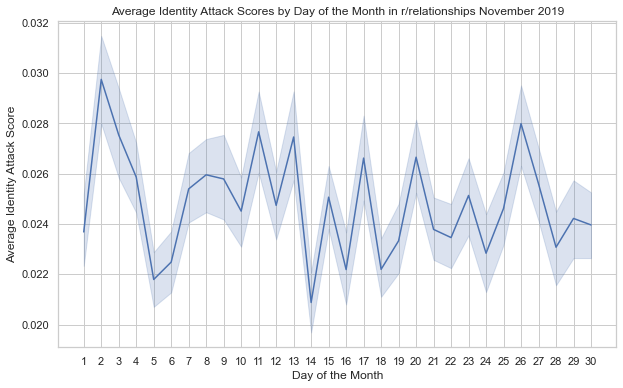

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Identity Attack",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Identity Attack Scores by Day of the Month in r/relationships November 2019')
plt.xlabel("Day of the Month")
plt.ylabel('Average Identity Attack Score')

# Insult

Text(0, 0.5, 'Average Insult Score')

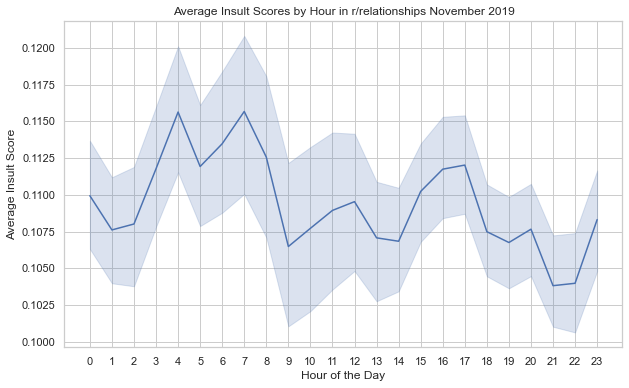

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Insult",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Insult Scores by Hour in r/relationships November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Insult Score')

Text(0, 0.5, 'Average Insult Score')

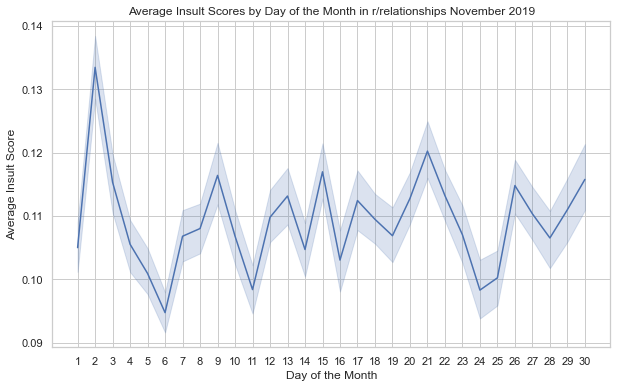

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Insult",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Insult Scores by Day of the Month in r/relationships November 2019')
plt.xlabel("Day of the Month")
plt.ylabel('Average Insult Score')

# Threat

Text(0, 0.5, 'Average Threat Score')

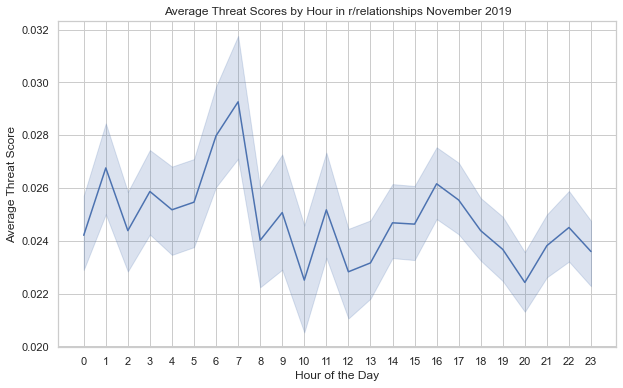

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Threat",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Threat Scores by Hour in r/relationships November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Threat Score')

Text(0, 0.5, 'Average Threat Score')

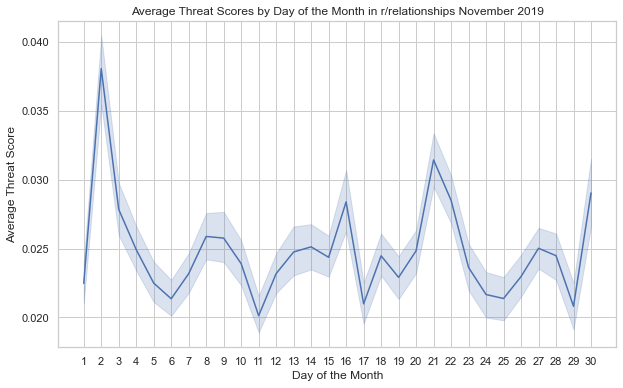

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Threat",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Threat Scores by Day of the Month in r/relationships November 2019')
plt.xlabel("Day of the Month")
plt.ylabel('Average Threat Score')

# Summary

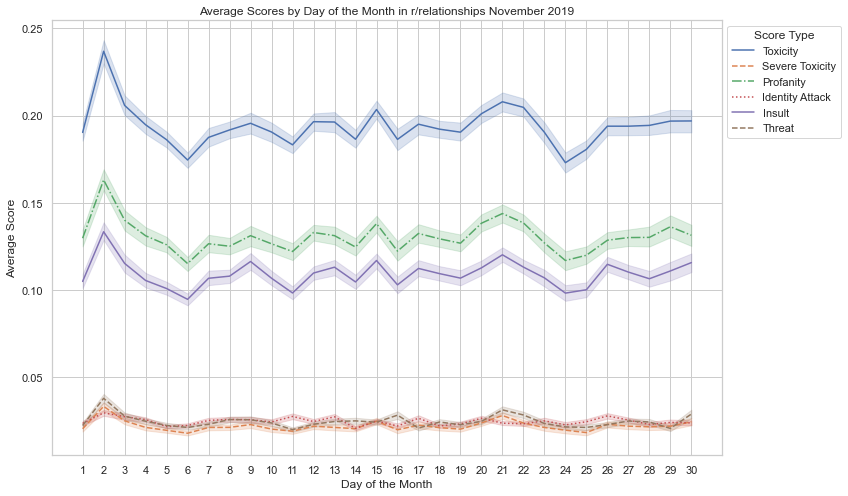

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(12, 8))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line charts für jede Spalte
sns.lineplot(data=df, x="created_day", y="Toxicity", label="Toxicity", palette="tab10")
sns.lineplot(data=df, x="created_day", y="Severe Toxicity", label="Severe Toxicity", palette="tab10", linestyle='--')
sns.lineplot(data=df, x="created_day", y="Profanity", label="Profanity", palette="tab10", linestyle='-.')
sns.lineplot(data=df, x="created_day", y="Identity Attack", label="Identity Attack", palette="tab10", linestyle=':')
sns.lineplot(data=df, x="created_day", y="Insult", label="Insult", palette="tab10", linestyle='-')
sns.lineplot(data=df, x="created_day", y="Threat", label="Threat", palette="tab10", linestyle='--')

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Day of the Month in r/relationships November 2019')
plt.xlabel("Day of the Month")
plt.ylabel('Average Score')

# Legende hinzufügen
plt.legend(title="Score Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


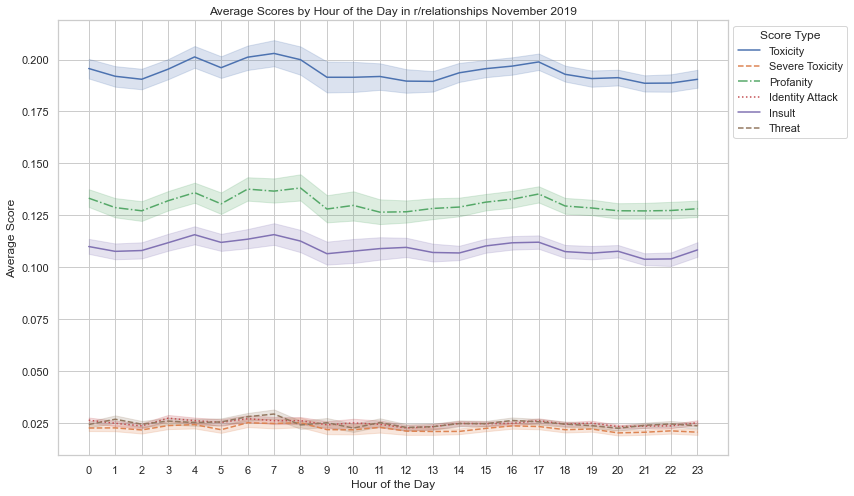

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(12, 8))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line charts für jede Spalte
sns.lineplot(data=df, x="created_hour", y="Toxicity", label="Toxicity", palette="tab10")
sns.lineplot(data=df, x="created_hour", y="Severe Toxicity", label="Severe Toxicity", palette="tab10", linestyle='--')
sns.lineplot(data=df, x="created_hour", y="Profanity", label="Profanity", palette="tab10", linestyle='-.')
sns.lineplot(data=df, x="created_hour", y="Identity Attack", label="Identity Attack", palette="tab10", linestyle=':')
sns.lineplot(data=df, x="created_hour", y="Insult", label="Insult", palette="tab10", linestyle='-')
sns.lineplot(data=df, x="created_hour", y="Threat", label="Threat", palette="tab10", linestyle='--')

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Hour of the Day in r/relationships November 2019')
plt.xlabel("Hour of the Day")
plt.ylabel('Average Score')

# Legende hinzufügen
plt.legend(title="Score Type", loc="upper left", bbox_to_anchor=(1, 1))

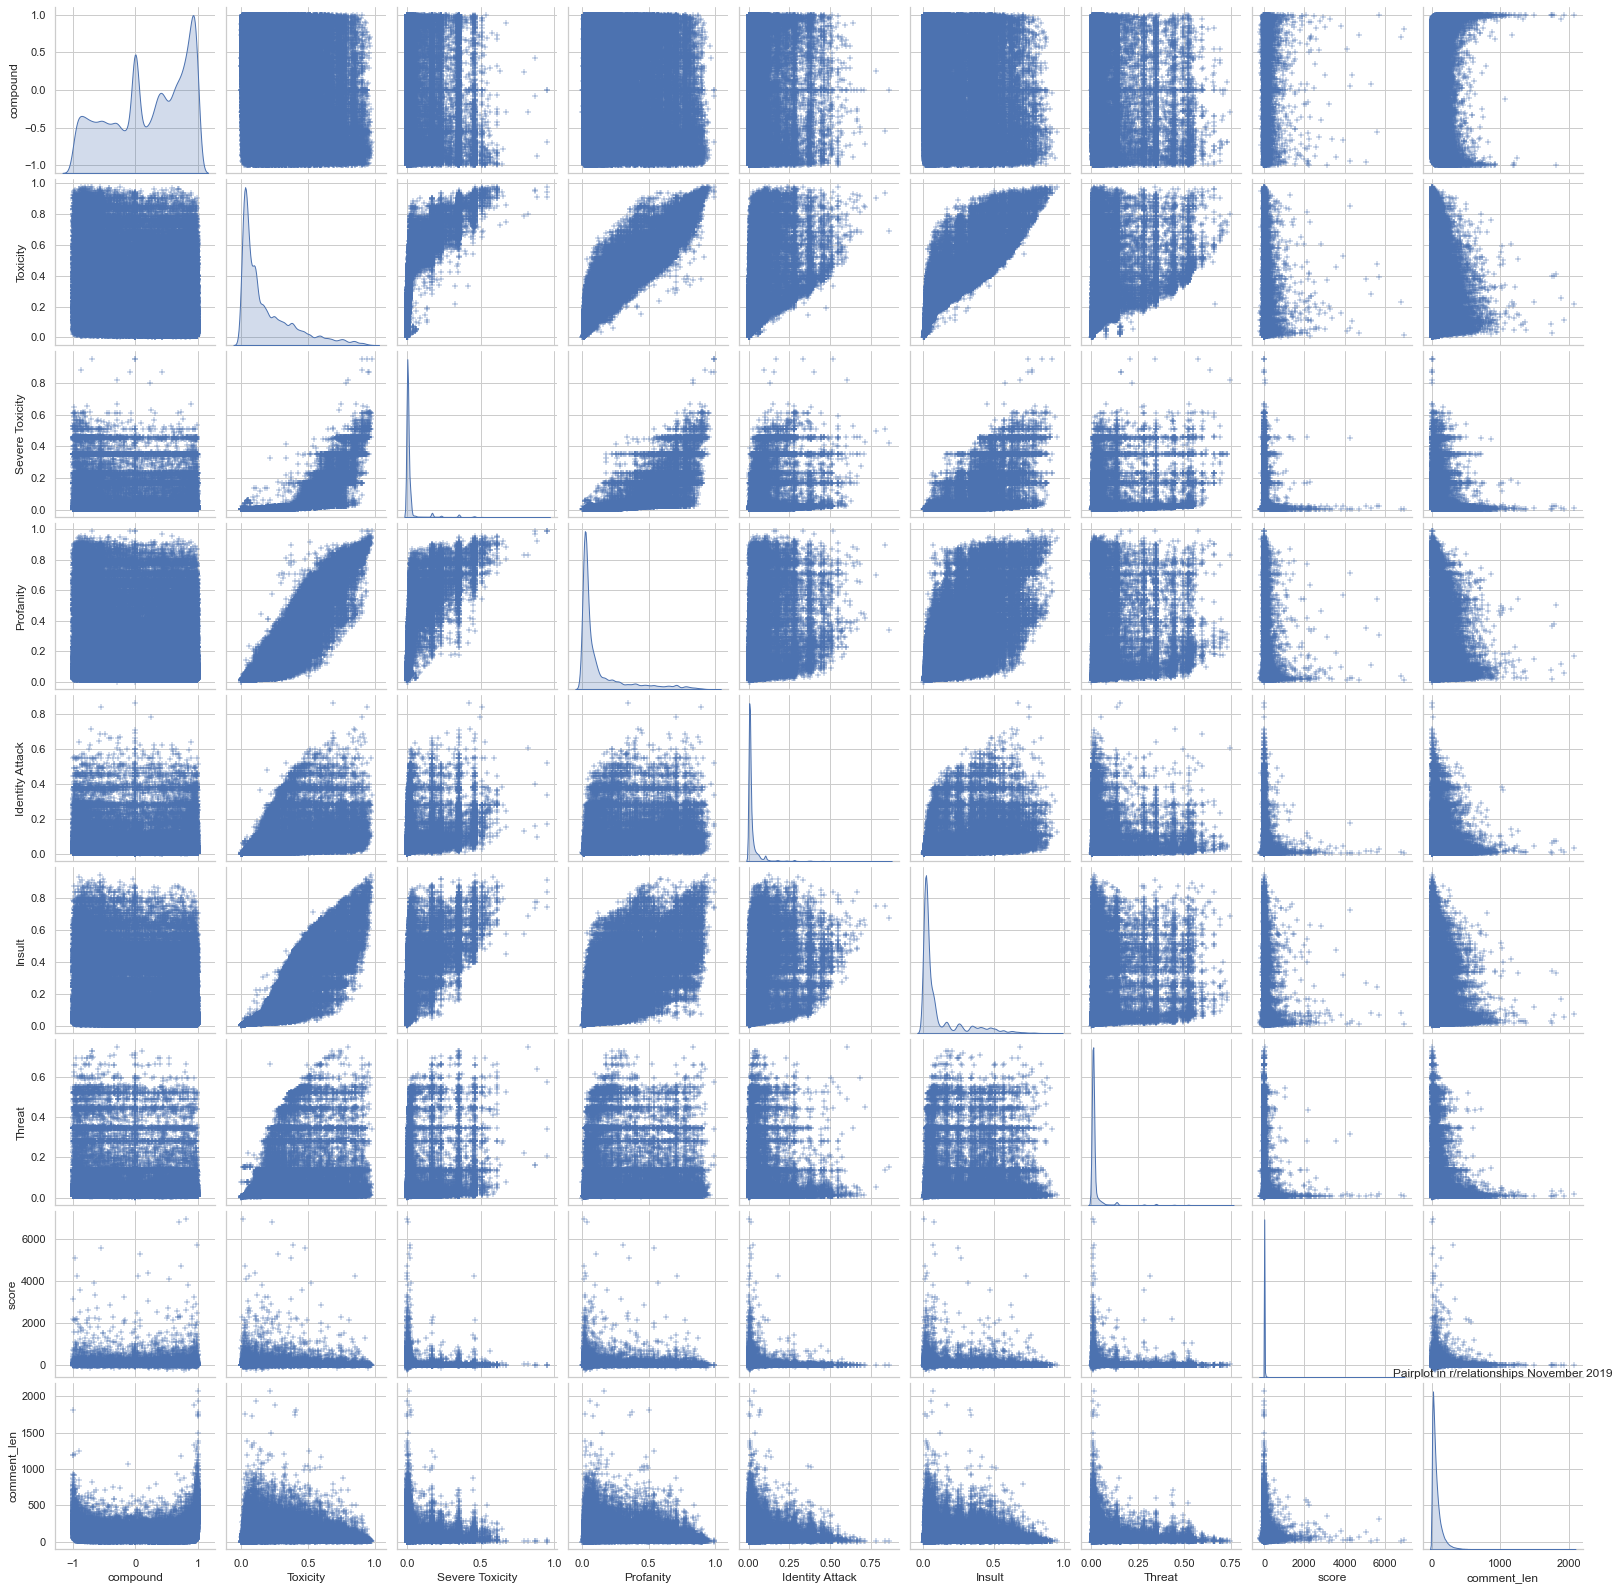

In [78]:
# Erstelle eine Pairplot-Matrix für ausgewählte Spalten
selected_columns = ['compound', 'Toxicity', 'Severe Toxicity', 'Profanity', 'Identity Attack', 'Insult', 'Threat',"score","comment_len"]
sns.pairplot(df[selected_columns], diag_kind='kde', markers='+')
plt.title("Pairplot in r/relationships November 2019")
plt.show()




# Submission based

# Nr of toxcix users

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162369 entries, 0 to 162368
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   author                         162369 non-null  object 
 1   Toxicity                       161617 non-null  float64
 2   Severe Toxicity                161617 non-null  float64
 3   Profanity                      161617 non-null  float64
 4   Identity Attack                161617 non-null  float64
 5   Insult                         161617 non-null  float64
 6   Threat                         161617 non-null  float64
 7   body                           162369 non-null  object 
 8   controversiality               162369 non-null  bool   
 9   created_utc                    162369 non-null  object 
 10  edited                         162369 non-null  bool   
 11  gilded                         162369 non-null  int64  
 12  id                            

In [80]:
import pandas as pd

# Kategorien für die Berechnung
categories = ['Toxicity', 'Severe Toxicity', 'Profanity', 'Identity Attack', 'Insult', 'Threat']

# DataFrame für die Ergebnisse erstellen
results_df = pd.DataFrame(columns=['Category', 'NumToxicUsers'])

for category in categories:
    # Gruppiere den DataFrame nach 'user_id' und berechne den Durchschnitt für jede Kategorie
    user_category_mean = df.groupby('author')[category].mean().reset_index()

    # Filtere Benutzer mit einem Durchschnitt von 0,7 oder größer
    toxic_users_category = user_category_mean[user_category_mean[category] >= 0.7]

    # Zähle die Anzahl der toxischen Benutzer für die Kategorie
    num_toxic_users_category = toxic_users_category.shape[0]

    # Ergebnisse zum DataFrame hinzufügen
    results_df = results_df.append({'Category': category, 'NumToxicUsers': num_toxic_users_category}, ignore_index=True)

# Ausgabe der Ergebnisse
print(results_df)





          Category NumToxicUsers
0         Toxicity           765
1  Severe Toxicity             2
2        Profanity           697
3  Identity Attack             0
4           Insult           134
5           Threat             2


In [81]:
# DataFrame für prozentuale Ergebnisse erstellen
percentage_results_df = pd.DataFrame(columns=['Category', 'PercentToxicUsers'])

# Gesamtanzahl der Benutzer
total_users = df['author'].nunique()

for category in categories:
    # Gruppiere den DataFrame nach 'user_id' und berechne den Durchschnitt für jede Kategorie
    user_category_mean = df.groupby('author')[category].mean().reset_index()

    # Filtere Benutzer mit einem Durchschnitt von 0,7 oder größer
    toxic_users_category = user_category_mean[user_category_mean[category] >= 0.7]

    # Zähle die Anzahl der toxischen Benutzer für die Kategorie
    num_toxic_users_category = toxic_users_category.shape[0]

    # Berechne den prozentualen Anteil toxischer Benutzer für die Kategorie
    percent_toxic_users_category = (num_toxic_users_category / total_users) * 100

    # Ergebnisse zum DataFrame hinzufügen
    percentage_results_df = percentage_results_df.append({'Category': category, 'PercentToxicUsers': percent_toxic_users_category}, ignore_index=True)

# Ausgabe der prozentualen Ergebnisse
print(percentage_results_df)



          Category  PercentToxicUsers
0         Toxicity           2.228177
1  Severe Toxicity           0.005825
2        Profanity           2.030117
3  Identity Attack           0.000000
4           Insult           0.390295
5           Threat           0.005825
